In [67]:
from IPython.display import Markdown

In [470]:
# WELCOME to the CLASSIFICATION PROBLEM of GENDER DETECTION from the DIALOGUE of a HOLLYWOOD MOVIE CHARACTER
Markdown('# WELCOME to the *CLASSIFICATION PROBLEM* of GENDER DETECTION from the DIALOGUE of a HOLLYWOOD MOVIE CHARACTER' + \
         '\n***Source: https://www.kaggle.com/Cornell-University/movie-dialog-corpus***' + \
        '\n\n**[Note. Description will be given below specific cell and within the white space \
        between two cells.]**' + '\n## PART 1: DATA MUNGING')

# WELCOME to the *CLASSIFICATION PROBLEM* of GENDER DETECTION from the DIALOGUE of a HOLLYWOOD MOVIE CHARACTER
***Source: https://www.kaggle.com/Cornell-University/movie-dialog-corpus***

**[Note. Description will be given below specific cell and within the white space         between two cells.]**
## PART 1: DATA MUNGING

In [90]:
import pandas as pd
import glob
tsvfiles = []
for file in glob.iglob('*.tsv',recursive=True):
    tsvfiles.append(file)
Markdown(f'[Note. There are {len(tsvfiles)} .tsv files.' + \
        '{}'.format([str(i+1)+'.'+x for i, x in enumerate(tsvfiles)]) + \
         '\n\nHowever, the 3 files we require are 1.movie_characters_metadata.tsv, 2.movie_conversations.tsv, and 3.movie_lines.tsv.'+ \
        '\n\nWe shall filter the files in sequence for **Data Munging** first and then apply **Machine Learning Techniques.**]')

[Note. There are 5 .tsv files.['1.movie_characters_metadata.tsv', '2.movie_conversations.tsv', '3.movie_lines.tsv', '4.movie_titles_metadata.tsv', '5.raw_script_urls.tsv']

However, the 3 files we require are 1.movie_characters_metadata.tsv, 2.movie_conversations.tsv, and 3.movie_lines.tsv.

We shall filter the files in sequence for **Data Munging** first and then apply **Machine Learning Techniques.**]

In [111]:
print('The pandas is a software library written for the Python programming language for data manipulation and analysis. \
In particular, it offers data structures and operations for manipulating numerical tables and time series. It opens \
[excel], [comma separed values], and [tab separed values] data files in the editor. We shall explore its great uses \
in this project.')

The pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It opens [excel], [comma separed values], and [tab separed values] data files in the editor. We shall explore its great uses in this project.


In [37]:
df_mov_chr_fld = pd.read_csv('movie_characters_metadata.tsv',sep='\t',header=None)
df_mov_chr_fld.head()

ParserError: Error tokenizing data. C error: Expected 6 fields in line 6565, saw 13


In [66]:
Markdown('[Note. It displays the message:' + 'ParserError: Error tokenizing data. C error: Expected 6 fields in line 6565, saw 13.'+ \
         '\n\nVisual observation of the file \'movie_characters_metadata.tsv\' shows that there are 9035 rows and 6 fields.'+ \
         '\n\nThe row nunber 6565 may omitted as one in 9035 is a nominal number. See below code.'
         ']')

[Note. It displays the message:ParserError: Error tokenizing data. C error: Expected 6 fields in line 6565, saw 13.

Visual observation of the file 'movie_characters_metadata.tsv' shows that there are 9035 rows and 6 fields.

The row nunber 6565 may omitted as one in 9035 is a nominal number. See below code.]

In [78]:
df1_mov_chr_fld = pd.read_csv('movie_characters_metadata.tsv',sep='\t',header=None,nrows=6564)
print(df1_mov_chr_fld.head(), '\n\n[Note. So, 2 dataframes are extracted, first one upto first 6564 rows, and the \
second one starting from 6566 to the rest.]')

    0         1   2                           3  4  5
0  u0    BIANCA  m0  10 things i hate about you  f  4
1  u1     BRUCE  m0  10 things i hate about you  ?  ?
2  u2   CAMERON  m0  10 things i hate about you  m  3
3  u3  CHASTITY  m0  10 things i hate about you  ?  ?
4  u4      JOEY  m0  10 things i hate about you  m  6 

[Note. So, 2 dataframes are extracted, first one upto first 6564 rows, and the second one starting from 6566 to the rest.]


In [36]:
df2_mov_chr_fld = pd.read_csv('movie_characters_metadata.tsv',sep='\t',header=None,skiprows=6565)
df2_mov_chr_fld.head()

,0,1,2,3,4,5
0,u6565,LEONARD'S WIFE,m436,memento,?,?
1,u6566,MRS. JANKIS,m436,memento,?,?
2,u6567,NATALIE,m436,memento,f,2
3,u6568,TEDDY,m436,memento,m,3
4,u6569,BARTENDER,m437,miami vice,?,?


In [112]:
df_mov_chr_fld = pd.concat([df1_mov_chr_fld, df2_mov_chr_fld], axis='rows', ignore_index=True)
print(df_mov_chr_fld, '\n\n[Note. So, 9035 - 1 = 9034 rows. Now is the time to place the column headings in dataframe. \
This information is provided in the \'File description\' section of README.txt file.]')

          0              1     2                           3  4  5
0        u0         BIANCA    m0  10 things i hate about you  f  4
1        u1          BRUCE    m0  10 things i hate about you  ?  ?
2        u2        CAMERON    m0  10 things i hate about you  m  3
3        u3       CHASTITY    m0  10 things i hate about you  ?  ?
4        u4           JOEY    m0  10 things i hate about you  m  6
...     ...            ...   ...                         ... .. ..
9029  u9030       DURNFORD  m616                   zulu dawn  ?  ?
9030  u9031        MELVILL  m616                   zulu dawn  ?  ?
9031  u9032  NORRIS-NEWMAN  m616                   zulu dawn  ?  ?
9032  u9033   STUART SMITH  m616                   zulu dawn  ?  ?
9033  u9034        VEREKER  m616                   zulu dawn  ?  ?

[9034 rows x 6 columns] 

[Note. So, 9035 - 1 = 9034 rows. Now is the time to place the column headings in dataframe. This information is provided in the 'File description' section of README.txt 

In [113]:
df_mov_chr_fld.columns = ['characterID','character name','movieID','movie title','gender','position in credits']
print(df_mov_chr_fld.head(), '\n\n[Note.The method .head() will show first five rows of the DataFrame.]')

  characterID character name movieID                 movie title gender  \
0          u0         BIANCA      m0  10 things i hate about you      f   
1          u1          BRUCE      m0  10 things i hate about you      ?   
2          u2        CAMERON      m0  10 things i hate about you      m   
3          u3       CHASTITY      m0  10 things i hate about you      ?   
4          u4           JOEY      m0  10 things i hate about you      m   

  position in credits  
0                   4  
1                   ?  
2                   3  
3                   ?  
4                   6   

[Note.The method .head() will show first five rows of the DataFrame.]


In [144]:
df_mov_chr_fld.head()

,characterID,character name,movieID,movie title,gender,position in credits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [161]:
print('Now, gender is the output. So, we need consistent values in gender. Let us check the unique values in genter column.')

Now, gender is the output. So, we need consistent values in gender. Let us check the unique values in genter column.


In [143]:
set(df_mov_chr_fld['gender'])

{'?', 'F', 'M', 'f', 'm', nan}

In [184]:
print('The output to be used for modeling should have [F, M, f, m] and not [?,nan].')

The output to be used for modeling should have [F, M, f, m] and not [?,nan].


In [185]:
len(df_mov_chr_fld[pd.isnull(df_mov_chr_fld['gender'])])

17

In [115]:
len(df_mov_chr_fld[df_mov_chr_fld['gender']=='?'])

6008

In [165]:
df_mov_chr_fld_mMfF = df_mov_chr_fld[(df_mov_chr_fld['gender']=='m') | (df_mov_chr_fld['gender']=='M') | \
                                    (df_mov_chr_fld['gender']=='f') | (df_mov_chr_fld['gender']=='F')]
len(df_mov_chr_fld_mMfF)

3009

In [166]:
df_mov_chr_fld_mMfF.head()

,characterID,character name,movieID,movie title,gender,position in credits
0,u0,BIANCA,m0,10 things i hate about you,f,4
2,u2,CAMERON,m0,10 things i hate about you,m,3
4,u4,JOEY,m0,10 things i hate about you,m,6
5,u5,KAT,m0,10 things i hate about you,f,2
6,u6,MANDELLA,m0,10 things i hate about you,f,7


In [176]:
len(df_mov_chr_fld[(df_mov_chr_fld['gender']!='m') & (df_mov_chr_fld['gender']!='M') & \
                  (df_mov_chr_fld['gender']!='f') & (df_mov_chr_fld['gender']!='F') & \
                  (df_mov_chr_fld['gender']!='?')])

17

In [178]:
len(df_mov_chr_fld.loc[pd.isnull(df_mov_chr_fld['gender'])])

17

In [190]:
len(df_mov_chr_fld[pd.isnull(df_mov_chr_fld['gender'])])

17

In [204]:
print('So, there are 3 ways, how we can extract NaN value rows from the \'gender\' column.')

So, there are 3 ways, how we can extract NaN value rows from the 'gender' column.


In [197]:
df_mov_chr_fld_unknown = df_mov_chr_fld[(df_mov_chr_fld['gender']=='?') | (pd.isnull(df_mov_chr_fld['gender']))]
len(df_mov_chr_fld_unknown)

6025

In [198]:
df_mov_chr_fld_unknown.head()

,characterID,character name,movieID,movie title,gender,position in credits
1,u1,BRUCE,m0,10 things i hate about you,?,?
3,u3,CHASTITY,m0,10 things i hate about you,?,?
8,u8,MISS PERKY,m0,10 things i hate about you,?,?
10,u10,SHARON,m0,10 things i hate about you,?,?
12,u12,ALONSO,m1,1492: conquest of paradise,?,?


In [205]:
print('[Now in all three files, we have charactrID. So, \'character name\' is redundant from modeling point of view. \
We also do not require \'position in credits\'. Let us drop these two columns. Also note that we have 3009 useful records \
to be further processed for modelling.]')

[Now in all three files, we have charactrID. So, 'character name' is redundant from modeling point of view. We also do not require 'position in credits'. Let us drop these two columns. Also note that we have 3009 useful records to be further processed for modelling.]


In [208]:
df_mov_chr_fld_mMfF.drop(['character name','position in credits'], axis = 1, inplace=True)
df_mov_chr_fld_unknown.drop(['character name','position in credits'], axis = 1, inplace=True)

C:\Users\Krishan Gopal\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [209]:
df_mov_chr_fld_mMfF.head()

,characterID,movieID,movie title,gender
0,u0,m0,10 things i hate about you,f
2,u2,m0,10 things i hate about you,m
4,u4,m0,10 things i hate about you,m
5,u5,m0,10 things i hate about you,f
6,u6,m0,10 things i hate about you,f


In [211]:
df_mov_chr_fld_unknown.head()

,characterID,movieID,movie title,gender
1,u1,m0,10 things i hate about you,?
3,u3,m0,10 things i hate about you,?
8,u8,m0,10 things i hate about you,?
10,u10,m0,10 things i hate about you,?
12,u12,m1,1492: conquest of paradise,?


In [236]:
print('These two dataframes may be saved as .tsv file for future use.')
df_mov_chr_fld_mMfF.to_csv('mov_chr_fld_mMfF.tsv',sep='\t',index=False)
df_mov_chr_fld_unknown.to_csv('mov_chr_fld_unknown.tsv',sep='\t',index=False)

These two dataframes may be saved as .tsv file for future use.


In [219]:
print('Let us now look into movie_conversations.tsv. This file indicates utterance IDs between two characters.')

Let us now look into movie_conversations.tsv. This file indicates utterance IDs between two characters.


In [213]:
df_mov_convers = pd.read_csv('movie_conversations.tsv',sep='\t',header=None)
df_mov_convers.head()

,0,1,2,3
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


In [232]:
len(df_mov_convers)

83097

In [233]:
df_mov_convers.columns = ['character1ID','character2ID','movieID','utteranceListID']
print(df_mov_convers.head(), '\n\n[Note.The method .head() will show first five rows of the DataFrame.]')

  character1ID character2ID movieID                utteranceListID
0           u0           u2      m0  ['L194' 'L195' 'L196' 'L197']
1           u0           u2      m0                ['L198' 'L199']
2           u0           u2      m0  ['L200' 'L201' 'L202' 'L203']
3           u0           u2      m0         ['L204' 'L205' 'L206']
4           u0           u2      m0                ['L207' 'L208'] 

[Note.The method .head() will show first five rows of the DataFrame.]


In [218]:
df_mov_convers.isnull().values.any()

False

In [235]:
print('So, we have added the column headers. There are no NaN values and furhter by visual inspection, we make sure \
that the dataframe may be saved back to file, now.')

So, we have added the column headers. There are no NaN values and furhter by visual inspection, we make sure that the dataframe may be saved back to file, now.


In [237]:
df_mov_convers.to_csv('mov_convers.tsv',sep='\t',index=False)

In [238]:
print('Let us now look into movie_lines.tsv. This file indicates the fields for \'utterance ID\', \'character ID\', \
\'movie ID\', \'character name\', and \'utterence\' by a characters.')

Let us now look into movie_lines.tsv. This file indicates the fields for 'utterance ID', 'character ID', 'movie ID', 'character name', and 'utterence' by a characters.


In [239]:
df_mov_line = pd.read_csv('movie_lines.tsv',sep='\t',header=None)
df_mov_line.head()

ParserError: Error tokenizing data. C error: Expected 5 fields in line 32288, saw 7


In [269]:
print('By inspection of the fields, we interpterte that first five columns are need to read.')

By inspection of the fields, we interpterte that first five columns are need to read.


In [270]:
df_mov_line = pd.read_csv('movie_lines.tsv',sep='\t',header=None,usecols=[0,1,2,3,4])
df_mov_line.head()

,0,1,2,3,4
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [271]:
print('Let us assign the column names first. Then we shall go for data munging.')

Let us assign the column names first. Then we shall go for data munging.


In [275]:
df_mov_line.columns = ['utteranceID', 'characterID', 'movieID', 'character name', 'utterance']
df_mov_line.head()

,utteranceID,characterID,movieID,character name,utterance
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [277]:
df_mov_line.isnull().values.any()

True

In [284]:
df_mov_line[df_mov_line.isna().any(axis=1)]

,utteranceID,characterID,movieID,character name,utterance
8,L870\tu0\tm0\tBIANCA\tI'm kidding. You know h...,NaN,NaN,NaN,NaN
10,"L868\tu2\tm0\tCAMERON\tThe ""real you"".",NaN,NaN,NaN,NaN
18,"L860\tu0\tm0\tBIANCA\tThen Guillermo says ""If ...",NaN,NaN,NaN,NaN
25,L693\tu2\tm0\tCAMERON\tI looked for you back a...,NaN,NaN,NaN,NaN
96,L589\tu4\tm0\tJOEY\tSo yeah I've got the Sears...,NaN,NaN,NaN,NaN
...,...,...,...,...,...
293303,L666362\tu9025\tm616\tBLOOMFIELD\tI listened e...,NaN,NaN,NaN,NaN
293304,L666361\tu9026\tm616\tBOY-PULLEN\tWill you hea...,NaN,NaN,NaN,NaN
293311,L666395\tu9032\tm616\tNORRIS-NEWMAN\tIf I've g...,NaN,NaN,NaN,NaN
293317,L666389\tu9032\tm616\tNORRIS-NEWMAN\tExcuse me...,NaN,NaN,NaN,NaN


In [296]:
df_mov_line[df_mov_line['utteranceID'].isna()]

,utteranceID,characterID,movieID,character name,utterance


In [285]:
print('There are the rows in utteranceID column, which have all the column data concatenated. See the example.')

There are the rows in utteranceID column, which have all the column data concatenated. See the example.


In [97]:
print('\'L870	u0	m0	BIANCA	I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?\' \
\n[Note. This is \'utteranceID\',\'characterID\',\'movieID\',\'character name\',\'utterance\'.]')

'L870	u0	m0	BIANCA	I'm kidding.  You know how sometimes you just become this "persona"?  And you don't know how to quit?' 
[Note. This is 'utteranceID','characterID','movieID','character name','utterance'.]


In [297]:
print('Let us try regular expression to group the column items from the string.')

Let us try regular expression to group the column items from the string.


In [350]:
import re
string = str('L870	u0	m0	BIANCA	I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?')
print(string)
regex = re.compile(r'(^L\d{1,6})\t(u\d+)\t(m\d+)\t([A-Za-z]+)\t(.+)')
lstRegex = regex.findall(string)
print('utteranceID =',lstRegex[0][0])
print('characterID =',lstRegex[0][1])
print('movieID =',lstRegex[0][2])
print('character name =',lstRegex[0][3])
print('utterance =',lstRegex[0][4])


L870	u0	m0	BIANCA	I'm kidding.  You know how sometimes you just become this "persona"?  And you don't know how to quit?
utteranceID = L870
characterID = u0
movieID = m0
character name = BIANCA
utterance = I'm kidding.  You know how sometimes you just become this "persona"?  And you don't know how to quit?


In [382]:
df_mov_line[df_mov_line.isna().any(axis=1)]['utteranceID']

8         L870\tu0\tm0\tBIANCA\tI'm kidding.  You know h...
10                   L868\tu2\tm0\tCAMERON\tThe "real you".
18        L860\tu0\tm0\tBIANCA\tThen Guillermo says "If ...
25        L693\tu2\tm0\tCAMERON\tI looked for you back a...
96        L589\tu4\tm0\tJOEY\tSo yeah I've got the Sears...
                                ...                        
293303    L666362\tu9025\tm616\tBLOOMFIELD\tI listened e...
293304    L666361\tu9026\tm616\tBOY-PULLEN\tWill you hea...
293311    L666395\tu9032\tm616\tNORRIS-NEWMAN\tIf I've g...
293317    L666389\tu9032\tm616\tNORRIS-NEWMAN\tExcuse me...
293340    L666384\tu9029\tm616\tCREALOCK\tEr called Nogg...
Name: utteranceID, Length: 4588, dtype: object

In [421]:
def cellsplit(string):
    string = str(string)
    regex = re.compile(r'(^L\d{1,6})\t(u\d+)\t(m\d+)\t([\'.A-Za-z-\s]+)\t(.+)')
    lstRegex = regex.findall(string)
    return lstRegex

In [99]:
print('The above function will split a single string into 5 groups. The following for loop will assign such records \
the correct cell values.')

The above function will split a single string into 5 groups. The following for loop will assign such records the correct cell values.


In [422]:
for index in df_mov_line[df_mov_line.isna().any(axis=1)].index:
    string = df_mov_line[df_mov_line.isna().any(axis=1)]['utteranceID'][index]
    lstRow = cellsplit(string)
    print(lstRow)
    if not lstRow: continue
    df_mov_line['utteranceID'][index] = lstRow[0][0]
    df_mov_line['characterID'][index] = lstRow[0][1]
    df_mov_line['movieID'][index] = lstRow[0][2]
    df_mov_line['character name'][index] = lstRow[0][3]
    df_mov_line['utterance'][index] = lstRow[0][4]
    print(df_mov_line[df_mov_line.index == index])

[]
[('L8440', 'u124', 'm8', "ALICE'S DAD", 'I watched from behind the stands.  Didn\'t want to embarrass you ya know.  "The drunk showed up" that kind of thing...')]
     utteranceID characterID movieID character name  \
3533       L8440        u124      m8    ALICE'S DAD   

                                              utterance  
3533  I watched from behind the stands.  Didn't want...  
[]
[('L59426', 'u403', 'm24', "O'NEILL", 'We\'ll spend an hour with "Nymphos Without Pants"...')]
      utteranceID characterID movieID character name  \
11506      L59426        u403     m24        O'NEILL   

                                               utterance  
11506  We'll spend an hour with "Nymphos Without Pant...  
[('L64614', 'u468', 'm28', "MRS. O'REILLY", 'Oh I am grateful to you sir.  I am the wife of Captain O\'Reilly hastening to join him at Dublin.  My chair was stopped by a highwayman; this great oaf of a servant-man fell down on his knees armed as he was and though there were thi

In [100]:
print('Character name redundancy is removed in the following:')

Character name redundancy is removed in the following:


In [428]:
df_mov_line.drop(['character name'], axis = 1, inplace = True)

In [101]:
print('Let us check below if there are any empty cells.')

Let us check below if there are any empty cells.


In [430]:
df_mov_line[df_mov_line.isna().any(axis=1)]

,utteranceID,characterID,movieID,utterance
538,L474,u5,m0,NaN
5468,L24609,u224,m14,NaN
35999,L239088,u1125,m74,NaN
44278,L283548,u1356,m90,NaN
47864,L298913\tu1445\tm97\tOKUN/ALIEN\tAir... water....,NaN,NaN,NaN
...,...,...,...,...
278675,L624042,u8606,m583,NaN
288281,L649938,u8876,m603,NaN
288443,L649416,u8879,m603,NaN
292005,L663421,u8980,m612,NaN


In [437]:
df_mov_line[df_mov_line['utterance'].isna().values]

,utteranceID,characterID,movieID,utterance
538,L474,u5,m0,NaN
5468,L24609,u224,m14,NaN
35999,L239088,u1125,m74,NaN
44278,L283548,u1356,m90,NaN
47864,L298913\tu1445\tm97\tOKUN/ALIEN\tAir... water....,NaN,NaN,NaN
...,...,...,...,...
278675,L624042,u8606,m583,NaN
288281,L649938,u8876,m603,NaN
288443,L649416,u8879,m603,NaN
292005,L663421,u8980,m612,NaN


In [103]:
print('Let us check if the enpty cells are in utterance column only. We should drop such records.')

Let us check if the enpty cells are in utterance column only. We should drop such records.


In [438]:
len(df_mov_line[df_mov_line.isna().any(axis=1)])==len(df_mov_line[df_mov_line['utterance'].isna().values])

True

In [440]:
len(df_mov_line)

293368

In [450]:
len(df_mov_line[df_mov_line['utterance'].isna().values])

388

In [448]:
print(f'In the above cell we checked whether all the rows in utterence field are NaN. This field will be a feature for \
modeling. So, let us delete the rows as {len(df_mov_line[df_mov_line["utterance"].isna().values])} is a nominal \
number of dataset size {len(df_mov_line)}.')

In the above cell we checked whether all the rows in utterence field are NaN. This field will be a feature for modeling. So, let us delete the rows as 388 is a nominal number of dataset size 293368.


In [455]:
df_mov_line.dropna(subset=['utterance'], axis=0, inplace=True)

In [458]:
print(f'So, above we have deleted all rows with utterance = NaN. Thus the total dataset size is now {len(df_mov_line)}.')

So, above we have deleted all rows with utterance = NaN. Thus the total dataset size is now 292980.


In [456]:
len(df_mov_line)

292980

In [459]:
print('Let us check if there are still NaN values.')

Let us check if there are still NaN values.


In [460]:
df_mov_line[df_mov_line.isna().any(axis=1)]

,utteranceID,characterID,movieID,utterance


In [461]:
print('So, we do not have any empty cells now. Let us save the dataframe for future use.')

So, we do not have any empty cells now. Let us save the dataframe for future use.


In [462]:
df_mov_line.to_csv('mov_line.tsv',index=False,sep='\t')

In [108]:
# PART 2: Build a classification model to classify the gender of a Hollywood movie character based on their 
# dialogues in the movie.
Markdown('## PART 2: BUILDING CLASSIFICATION MODEL \n ### This is a binary classification probelm with output as \
male or female. The input will typically be aggregation of all utterances of a unique movie character. As in the ML problem, \
the optimizer accepts numerical values only, all other values should be converted to numerical data types before applying \
RNN. In addition, we shall try *Supervised Learning with Word Embeddings*.')

## PART 2: BUILDING CLASSIFICATION MODEL 
 ### This is a binary classification probelm with output as male or female. The input will typically be aggregation of all utterances of a unique movie character. As in the ML problem, the optimizer accepts numerical values only, all other values should be converted to numerical data types before applying RNN. In addition, we shall try *Supervised Learning with Word Embeddings*.

In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [112]:
print('Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays \
and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. Tensorflow \
is a library developed by google inc. to execute neural network algorithms. Initially keras was developed to provide \
Python interface for artificial neural networks and acts as an interface for the TensorFlow library. Now, tensorflow \
encapsulates keras. We shall expore tensorflow and keras library and class functions heavily to work on this project.')

Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. Tensorflow is a library developed by google inc. to execute neural network algorithms. Initially keras was developed to provide Python interface for artificial neural networks and acts as an interface for the TensorFlow library. Now, tensorflow encapsulates keras. We shall expore tensorflow and keras library and class functions heavily to work on this project.


In [114]:
print('We shall work on two files, viz. mov_chr_fld_mMfF.tsv, mov_line.tsv that we cleaned in Part - 1 of this project. \
In modelling of Natural Language Processing problems we prefer Recurrent Neural Netowrk (RNN) in order to optimize \
speed and memory. In any ML problem, we first identify the fields of database(s) that can serve as inputs to modeling \
problem. These fileds are typically called as feature vectors. We also identify the output that is a sinle column. \
Again, in case, we need to classify the quantities into 2 classes only, we call it a binary classification problem, \
as in the present case. We need to identify the movie character as male or female. If the number of classes increases \
beyond 2, we classify it as Multi Class Classification.')

We shall work on two files, viz. mov_chr_fld_mMfF.tsv, mov_line.tsv that we cleaned in Part - 1 of this project. In modelling of Natural Language Processing problems we prefer Recurrent Neural Netowrk (RNN) in order to optimize speed and memory. In any ML problem, we first identify the fields of database(s) that can serve as inputs to modeling problem. These fileds are typically called as feature vectors. We also identify the output that is a sinle column. Again, in case, we need to classify the quantities into 2 classes only, we call it a binary classification problem, as in the present case. We need to identify the movie character as male or female. If the number of classes increases beyond 2, we classify it as Multi Class Classification.


In [7]:
df_mov_chr_gender = pd.read_csv('mov_chr_fld_mMfF.tsv',sep='\t')
df_mov_utterance = pd.read_csv('mov_line.tsv',sep='\t')

In [8]:
df_mov_chr_gender.head()

,characterID,movieID,movie title,gender
0,u0,m0,10 things i hate about you,f
1,u2,m0,10 things i hate about you,m
2,u4,m0,10 things i hate about you,m
3,u5,m0,10 things i hate about you,f
4,u6,m0,10 things i hate about you,f


In [9]:
df_mov_utterance.head()

,utteranceID,characterID,movieID,utterance
0,L1045,u0,m0,They do not!
1,L1044,u2,m0,They do to!
2,L985,u0,m0,I hope so.
3,L984,u2,m0,She okay?
4,L925,u0,m0,Let's go.


In [517]:
print('The output of the model is gender. Let us convert the gender column to binary in df_mov_chr_gender.')

The output of the model is gender. Let us convert the gender column to binary in df_mov_chr_gender.


In [10]:
dict_gender_encode = {'M':0, 'm':0, 'F':1, 'f':1}
dict_gender_encode

{'M': 0, 'm': 0, 'F': 1, 'f': 1}

In [11]:
def gender_encoder(x):
    for key,value in dict_gender_encode.items():
        if x==key: 
            return value

In [12]:
df_mov_chr_gender['gender_binary'] = df_mov_chr_gender[['gender']].apply(lambda x: gender_encoder(*x), axis=1)

In [13]:
df_mov_chr_gender.head()

,characterID,movieID,movie title,gender,gender_binary
0,u0,m0,10 things i hate about you,f,1
1,u2,m0,10 things i hate about you,m,0
2,u4,m0,10 things i hate about you,m,0
3,u5,m0,10 things i hate about you,f,1
4,u6,m0,10 things i hate about you,f,1


In [14]:
df_mov_chr_gender.drop(['gender'], axis=1, inplace=True)

In [15]:
df_mov_chr_gender.head()

,characterID,movieID,movie title,gender_binary
0,u0,m0,10 things i hate about you,1
1,u2,m0,10 things i hate about you,0
2,u4,m0,10 things i hate about you,0
3,u5,m0,10 things i hate about you,1
4,u6,m0,10 things i hate about you,1


In [115]:
print('We need to define the vocabulary of the unique words that later forms the features through One Hot Encoding (OHE). \
This technique forms a square matrix of 0s and 1s with only single 1 per row or column. This technique is used for \
numerical encoding of non-numerical data, specially the words or phrases. Internally one column of OHE data is dropped to \
avoid any multi-colinearity data trap.')

We need to define the vocabulary of the unique words that later forms the features through One Hot Encoding (OHE). This technique forms a square matrix of 0s and 1s with only single 1 per row or column. This technique is used for numerical encoding of non-numerical data, specially the words or phrases. Internally one column of OHE data is dropped to avoid any multi-colinearity data trap.


In [16]:
def filter_word(word):
    regex = re.compile(r'[A-za-z]+')
    new_word = regex.match(word)
    if new_word: return new_word[0]

In [18]:
import re
vocab = []
filtered_words = []
for item in df_mov_utterance['utterance']:
    filtered_words.extend(map(filter_word,item.split()))
vocab = list(set(filtered_words))
print(f'Vocab ready with length {len(vocab)}, last few samples...{vocab[-10:-1]}')

Vocab ready with length 59450, last few samples...['Witch', 'Loma', 'spooning', 'boychick', 'Ai', 'clobbered', 'conqueror', 'inhibited', 'scholar']


In [561]:
print('Let us now prepare the inputs, that is  features (X) and output, that is gender (y). \
\nSo, all the words uttered by a character will form his/her feature vector element.')

Let us now prepare the inputs, that is  features (X) and output, that is gender (y). 
So, all the words uttered by a character will form his/her feature vector element.


In [19]:
df_mov_utterance_gby_chrid = df_mov_utterance.groupby('characterID')
df_mov_utterance_gby_chrid

In [20]:
df_mov_utterance[0:5] # first five recods in the dataframe. This command is same as df_mov_utterance.head()

,utteranceID,characterID,movieID,utterance
0,L1045,u0,m0,They do not!
1,L1044,u2,m0,They do to!
2,L985,u0,m0,I hope so.
3,L984,u2,m0,She okay?
4,L925,u0,m0,Let's go.


In [21]:
dict_features = {}
lstCharwords = []
lstFeatureLen = []
for chrid, df_mov_utterance_gby in df_mov_utterance_gby_chrid:
    if chrid in df_mov_chr_gender['characterID'].values:
        filtered_words = ''
        for item in df_mov_utterance_gby['utterance']:
            filtered_words += item
        dict_features[chrid] = filtered_words
        lstCharwords.append(filtered_words)
        lstFeatureLen.append(len(filtered_words.split()))
print(f'{len(dict_features)} long character list with unique word set is ready for One Hot Encoding.')
# print(len(lstCharwords))
# print(len(lstFeatureLen))
# print(lstCharwords[0])

2951 long character list with unique word set is ready for One Hot Encoding.


In [22]:
lstGender = []
for key in dict_features:
    if key in df_mov_chr_gender['characterID'].values:
        lstGender.extend(df_mov_chr_gender[df_mov_chr_gender['characterID']==key]['gender_binary'].values)
y = np.array(lstGender)
len(y)

2951

In [628]:
print('Let us now do One Hot Encoding of the features for which we require length of vocab.')

Let us now do One Hot Encoding of the features.


In [23]:
vocab_size = len(vocab)
vocab_size

59450

In [24]:
ohe = [one_hot(char_words, vocab_size) for char_words in lstCharwords]

In [25]:
print('So, each word got an encoding. Each word is associated with some assumed features (to be estimated by \
RNN), say 300. So, depending upon the number of words per character, there should be padding to serve the smallest \
slab for the neurons to be fixed. So, we search for the longest word collection, we can say \
longest (max) Aggregate Utterance (AU).')

So, each word got an encoding. Each word is associated with some assumed features (to be estimated by RNN), say 300. So, depending upon the number of words per character, there should be padding to serve smallest slab for the neurons to be fixed. So, we search for the longest word collection, we can say longest (max) Aggregate Utterance (AU).


In [26]:
max_AU = max(lstFeatureLen)
max_AU

6178

In [27]:
padded_AU = pad_sequences(ohe, maxlen=max_AU, padding='post')

In [28]:
padded_AU

array([[56982, 25261, 46168, ...,     0,     0,     0],
       [45730, 58524, 55639, ...,     0,     0,     0],
       [58031, 35203, 17718, ...,     0,     0,     0],
       ...,
       [ 4182, 52031, 48301, ...,     0,     0,     0],
       [ 2064, 20427, 17718, ...,     0,     0,     0],
       [47370, 10657, 49159, ...,     0,     0,     0]])

In [29]:
embedding_vector_size = 300 # This value is used to estimate weights to characterize each word.
model = Sequential() # defines the RNN model framework
model.add(Embedding(vocab_size, embedding_vector_size, input_length=max_AU, name='embedding')) # 300 by 59450 input layer
model.add(Flatten()) # typical collection of words from a movie character's utterances in vertical stack
model.add(Dense(1, activation='sigmoid')) # the output layer of single neuron. Binary classification, so sinmoid function.

In [30]:
X = padded_AU

In [119]:
print('So input is a numpy array of numbers. The padded_AU is the candidate for feature vectors (X). \
Next, we compile the model and check the connections of neural layers using summary method.')

So input is a numpy array of numbers. The padded_AU is the candidate for feature vectors (X). Next, we compile the model and check the connections of neural layers using summary method.


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 6178, 300)         17835000  
_________________________________________________________________
flatten (Flatten)            (None, 1853400)           0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1853401   
Total params: 19,688,401
Trainable params: 19,688,401
Non-trainable params: 0
_________________________________________________________________


In [120]:
print('Now, we split the data into training and testing samples. Generally, 20% - 30% data is reserved for testing after the \
model is developed. sklearn library of scikit-learn is used to import train_test_split function. The output here is two \
tuples of two vectors each for X and y.')

Now, we split the data into training and testing samples. Generally, 20% - 30% data is reserved for testing after the model is developed. sklearn library of scikit-learn is used to import train_test_split function. The output here is two tuples of two vectors each for X and y.


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
len(X_train), len(X_test)

(2360, 591)

In [34]:
model.fit(X_train, y_train, epochs=20, verbose=0)

In [121]:
print('Now as the model is trained, we shall call few functions to test its accuracy. We shall also try few techniques to \
check model performance using random samples.')

Now as the model is trained, we shall call few functions to test its accuracy. We shall also try few techniques to check model performance using random samples.


In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

19/19 [==============================] - 3s 127ms/step - loss: 0.8280 - accuracy: 0.7107


0.710659921169281

In [46]:
Weights = model.get_layer('embedding').get_weights()[0]
len(Weights)

59450

In [50]:
print(f'So we received the RNN weights for each word as verified below. \'Weights\' is Embedding Matrix of all {len(weights)} \
words in vocab.')

So we received the RNN weights for each word as verified below. 'Weights' is Embedding Matrix of all 59450 words in vocab.


In [37]:
vocab_size==len(weights)

True

In [52]:
print('Check below, two embedding vectors and length of each such vector as assumed while adding embedding layer in the model.')

Check below, two embedding vectors and length of each such vector as assumed while adding embedding layer in the model.


In [42]:
weights[:2]

array([[ 3.24946741e-04,  9.18308459e-03, -3.10075539e-03,
        -1.06288232e-02, -1.81416588e-04, -3.64648695e-05,
         6.68999925e-03, -2.14337808e-04,  6.84037106e-04,
        -4.08198248e-04, -4.15452290e-04, -4.54992842e-04,
         2.85623915e-04,  3.81432404e-03,  1.41941273e-04,
         2.02737050e-03, -2.38610734e-03,  2.83952213e-05,
        -2.51283018e-05,  6.26918161e-04,  6.91687316e-03,
         3.09428433e-04, -1.60315627e-04,  2.78884917e-03,
        -8.57112464e-03,  7.87208416e-03,  4.48956474e-04,
         2.56049116e-05, -3.89815687e-05,  7.20401702e-04,
        -8.06370564e-03, -1.41243130e-04, -1.98075300e-04,
         7.38965534e-03,  1.45725120e-04,  8.54841346e-05,
         3.06810369e-04, -2.11316132e-04, -3.22808541e-04,
        -2.31859449e-04,  1.63197710e-05,  1.58037234e-03,
        -6.37316098e-03, -6.30955212e-03, -8.18209071e-03,
        -1.05855834e-04, -2.47457228e-06, -2.32794016e-04,
         9.15635191e-03, -1.66949074e-04,  2.55429622e-0

In [43]:
len(weights[0])

300

In [54]:
print('Let us predict the y from X_test.')

Let us predict the y from X_test.


In [55]:
y_predicted = model.predict(X_test)
y_predicted[:10]

array([[0.00130492],
       [0.00451964],
       [0.02021784],
       [0.10330877],
       [0.9993159 ],
       [0.10505342],
       [0.03431305],
       [0.03244153],
       [0.16834342],
       [0.77578163]], dtype=float32)

In [123]:
print('Here we tried to predict the model outputs from test inputs. The output is probabilistic as the output function of RNN\
 is sigmoid. So, in fact, we can transform it in 0 (male) and 1 (female) using the following:')

Here we tried to predict the model outputs from test inputs. the output is probabilistic as the output function of RNN is sigmoid. So, in fact we can transform it in 0 (male) and 1 (female) using the following:


In [60]:
def sigmoid(y):
    if y >= 0.5: return 1
    else: return 0
    
y_predicted_binary = np.array([sigmoid(y) for y in y_predicted])
y_predicted_binary[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [57]:
y_test[:10]

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [62]:
print('So in the first 10 predictions, we observe 80% accuracy.')

So in the first 10 predictions, we observe 80% accuracy.


In [63]:
from sklearn.metrics import confusion_matrix # confusion_matrix is used for data visualization
cm = confusion_matrix(y_test, y_predicted_binary)
cm

array([[380,  22],
       [149,  40]], dtype=int64)

Text(69.0, 0.5, 'True')

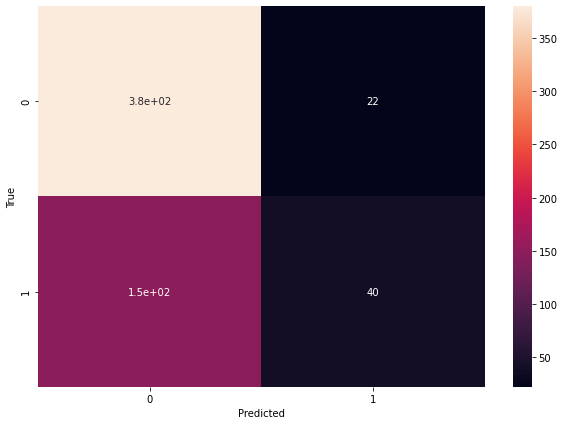

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn     # This along with confusion_matrix gives an interesting visualizing effect of true Vs predicted output
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [65]:
print('Let us now infer [Accuracy], [Precision], [Recall] and [f1 Score]. \
Def. In statistical analysis of binary classification, the F-score or F-measure is a measure of a test\'s accuracy.\
 Please refer to https://en.wikipedia.org/wiki/F-score')

Let us now infer [Accuracy], [Precision], [Recall] and [f1 Score]. Def. In statistical analysis of binary classification, the F-score or F-measure is a measure of a test's accuracy. Please refer to https://en.wikipedia.org/wiki/F-score


In [82]:
Markdown('# Male (0) \n\n### True Positive: TP = 380\n\n### False Positive: FP = 151\n\n### True Negative: TN = 40 \
\n\n### False Negative: FN = 22')

# Male (0) 

### True Positive: TP = 380

### False Positive: FP = 151

### True Negative: TN = 40 

### False Negative: FN = 22

In [92]:
print('Accuracy: How many predictions are right. (380+40)/(380+149+22+40)*100 in %.')
accuracy = (380+40)/(380+149+22+40)*100
accuracy

Accuracy: How many predictions are right. (380+40)/(380+149+22+40)*100 in %.


71.06598984771574

In [93]:
print('Precision: Out of all male predictions how many are right. TP/(TP+FP) = 380/(380+149)*100 in %.')
precision = 380/(380+149)*100
precision

Precision: Out of all male predictions how many are right. TP/(TP+FP) = 380/(380+149)*100 in %.


71.83364839319471

In [94]:
print('Recall: How many male true samples are correctly predicted. TP/(TP+FN) = 3380/(380+22)*100 in %.')
recall = 380/(380+22)*100
recall

Recall: How many male true samples are correctly predicted. TP/(TP+FN) = 3380/(380+22)*100 in %.


94.5273631840796

In [96]:
print('F1 Score: The F1 score is the harmonic mean of the precision and recall. \
f1score = 2/((precision/100)**(-1)+(recall/100)**(-1))*100 = 2/(71.83364839319471/100)**(-1)+(94.5273631840796/100)**(-1))*100 \
in %.')
f1score = 2/((precision/100)**(-1)+(recall/100)**(-1))*100
f1score

F1 Score: The F1 score is the harmonic mean of the precision and recall. f1score = 2/((precision/100)**(-1)+(recall/100)**(-1))*100 = 2/(71.83364839319471/100)**(-1)+(94.5273631840796/100)**(-1))*100 in %.


81.63265306122447

In [124]:
print('The same can be used for data visualization of [FEMALE] with necessay considerations.')

The same can be used for data visualization of [FEMALE] with necessay considerations.


In [125]:
print('There are still many feartures of sklearn and tensorflow left unused in this project.')

There are still many feartures of sklearn and tensorflow left unused in this project.


In [129]:
Markdown('### [CLOSING of the project *CLASSIFICATION PROBLEM* of GENDER DETECTION from the DIALOGUE of a HOLLYWOOD \
MOVIE CHARACTER]')

### [CLOSING of the project *CLASSIFICATION PROBLEM* of GENDER DETECTION from the DIALOGUE of a HOLLYWOOD MOVIE CHARACTER]